# CREDIT CARD FRAUD DETECTION

### PROBLEM STATEMENT
To analyze customer-level data which has been collected and to predict fraudulent credit card transactions with the help of machine learning models.

INTRODUCTION

The datasets contains transactions made by credit cards in September 2013 by European cardholders. 
It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#IGNORE WARNINGS
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#LOAD CSV
ccc = pd.read_csv("C:/Users/tallaprd/Desktop/PGDDS/COURSE 6- Ecommerce/Capstone/creditcard.csv")

In [4]:
ccc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
ccc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## DATA UNDERSTANDING AND EXPLORATION

Text(0, 0.5, 'Frequency')

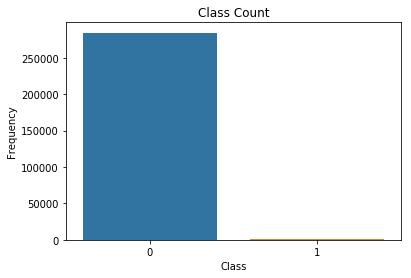

In [6]:
class_count = pd.value_counts(ccc['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=ccc)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

As we can see, the fraud transanctions are very low in number in the overall data hence there is data imbalance.

In [7]:
fraud = ccc[ccc.Class == 1]
normal = ccc[ccc.Class == 0]

Text(0, 0.5, 'Frequency')

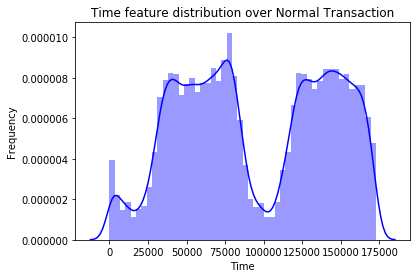

In [8]:
sns.distplot(normal.Time, color='b')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

The normal transactions distribution has 2 peaks in the data and nothing is unusual.

Text(0, 0.5, 'Frequency')

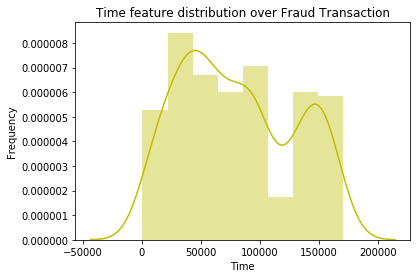

In [9]:
sns.distplot(fraud.Time, color='y')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Above is the distribution of fraud transactions and it looks normal.

Text(0, 0.5, 'Frequency')

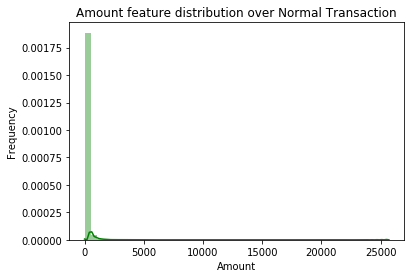

In [10]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

There is a peak in the beginning for normal transactions but then it becomes flat.

Text(0, 0.5, 'Frequency')

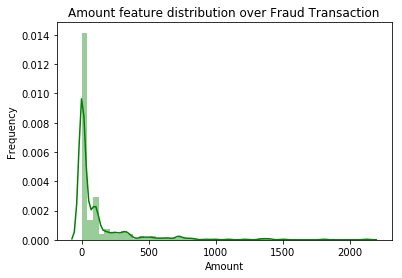

In [11]:
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Similar with fraud transactions- there is peak in the beginning which flattens later.

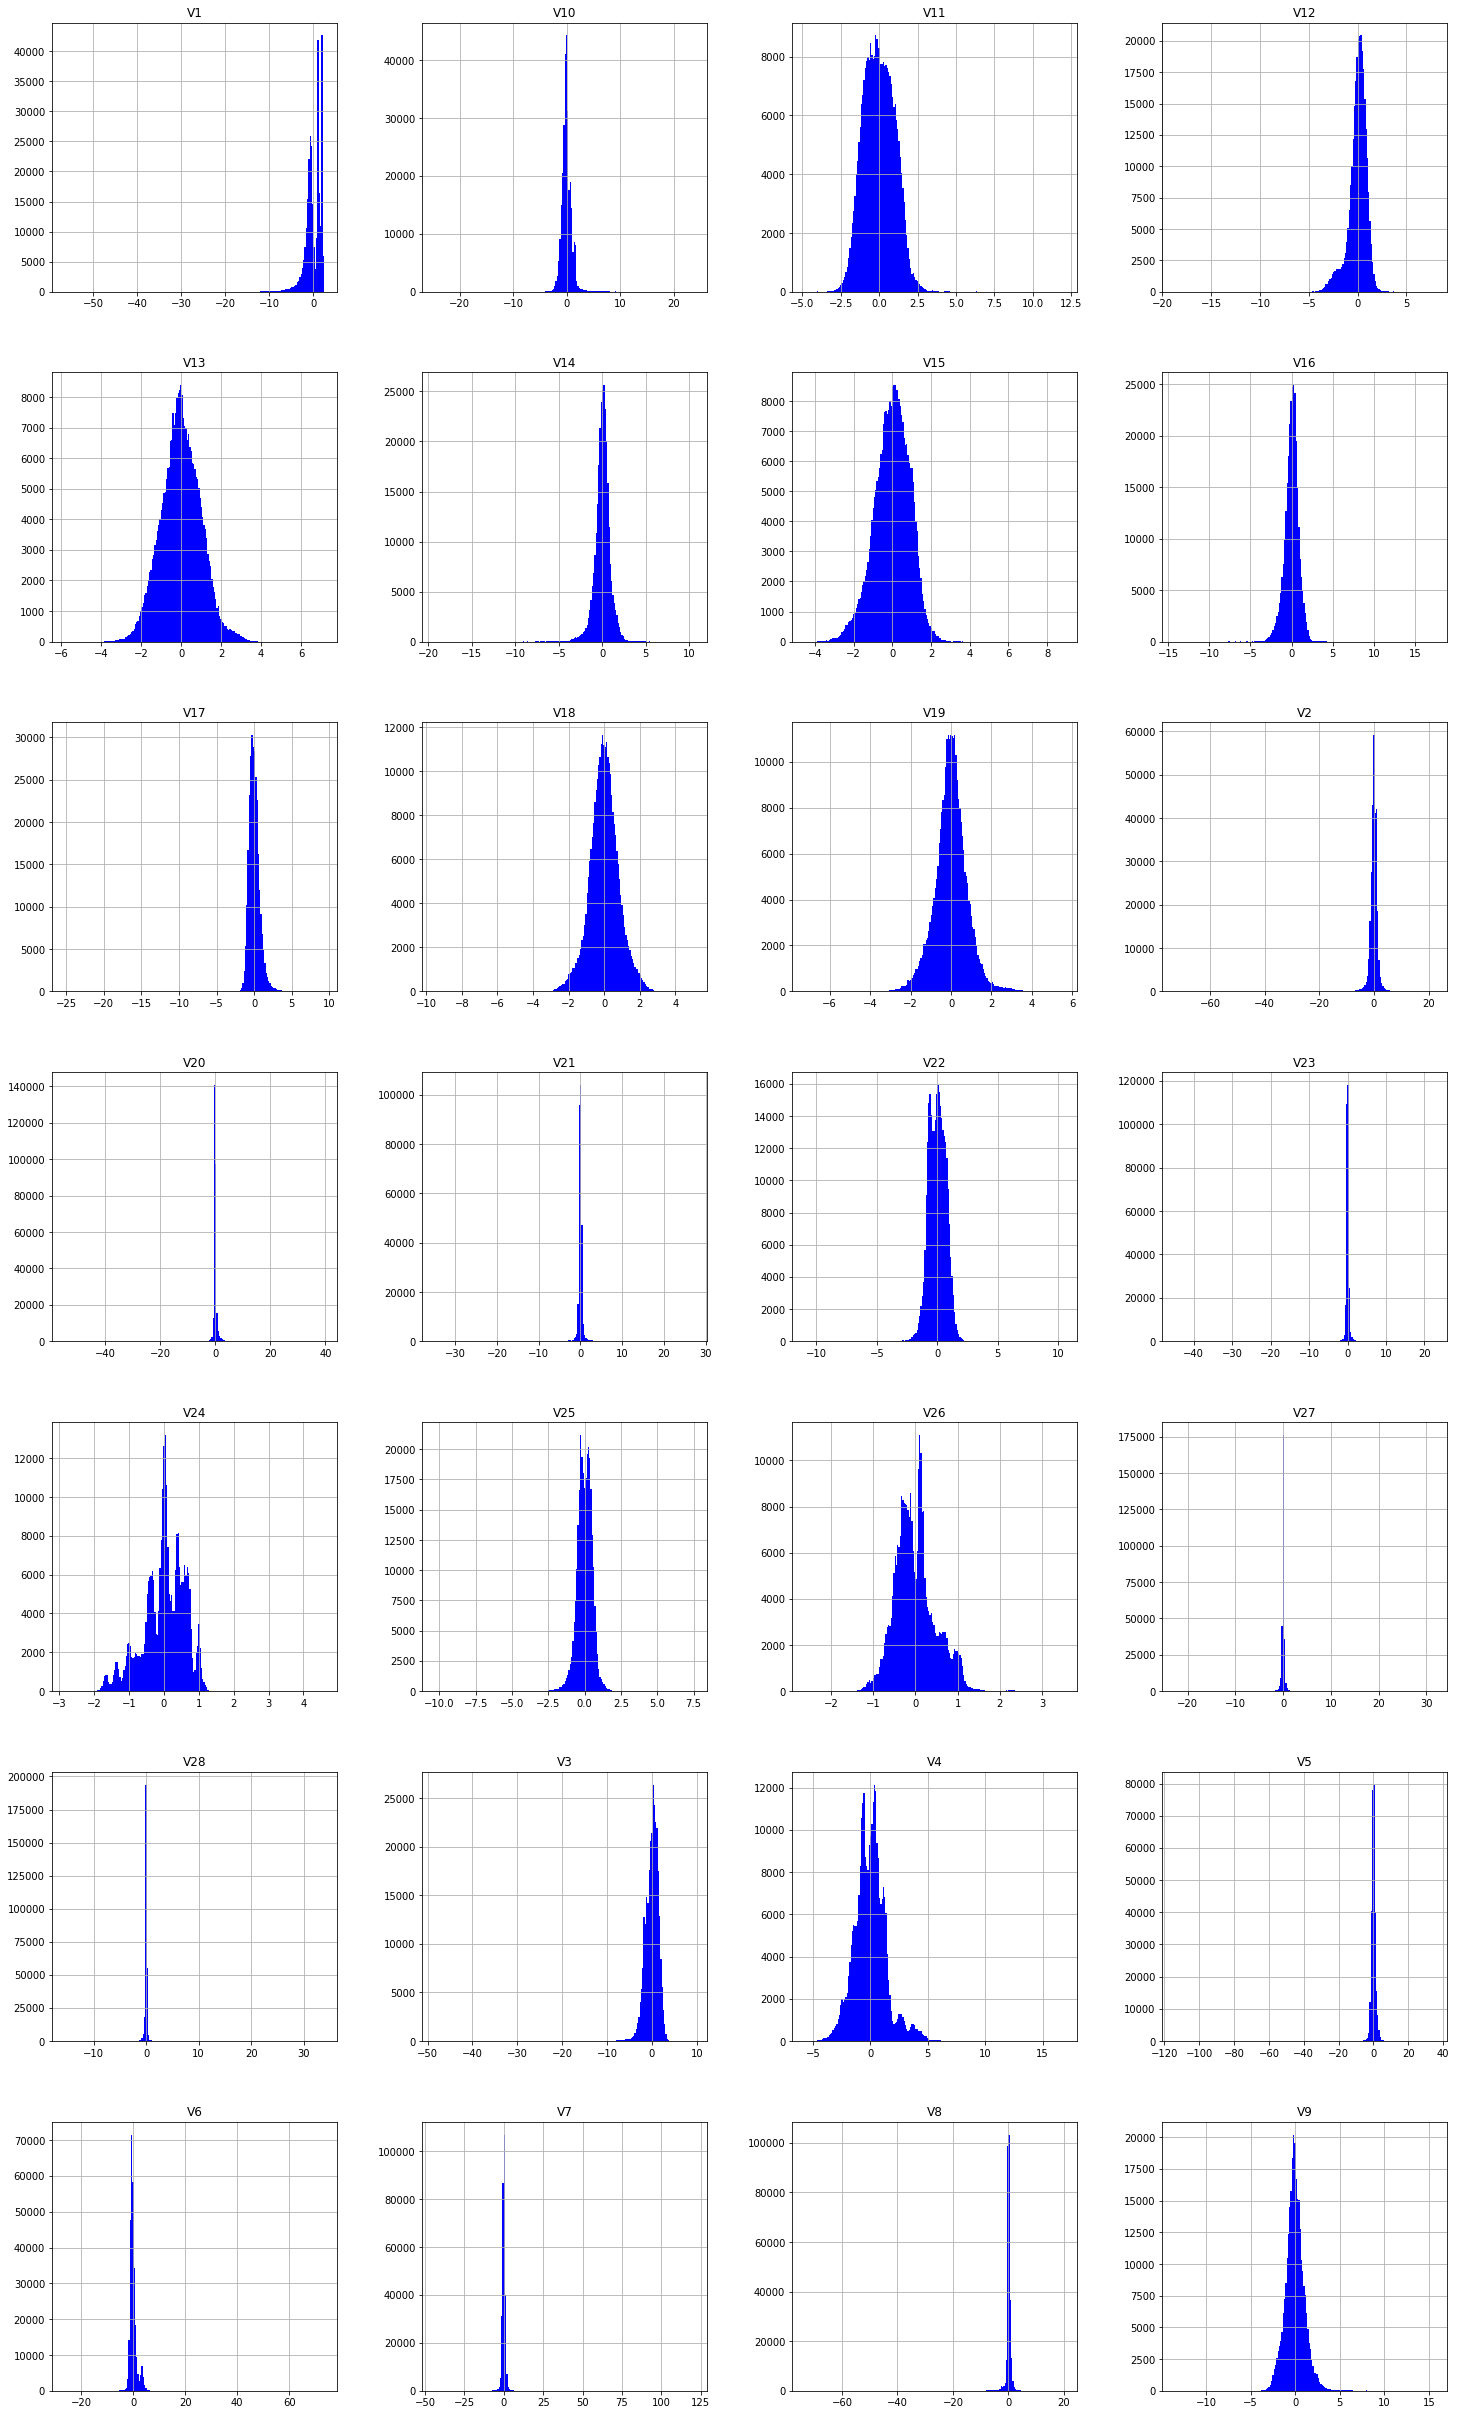

In [12]:
#CHECKING DISTRIBUTION OF INDEPENDENT VARIABLES
ccc.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

Features like V11, V15, V13, V18, V19 has a wider. Some features like V6, V7, V8 and V28 have a very low spread as compared to other features.

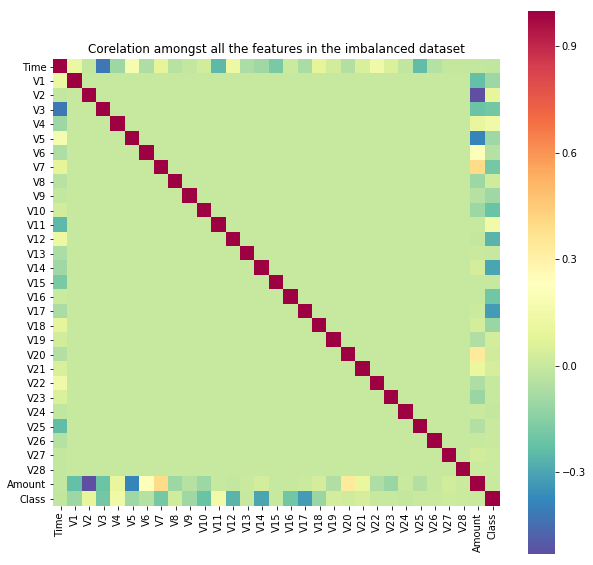

In [13]:
#CORRELATION MATRIX FOR INDEPENDENT FEATURES
cor_matr = ccc.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

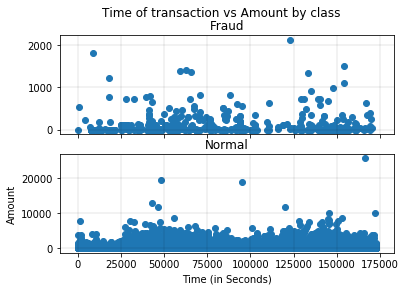

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [44]:
features=[i for i in ccc.drop(['Class','Amount','Time'],axis=1).columns]
len(features)

28

<Figure size 1008x576 with 0 Axes>

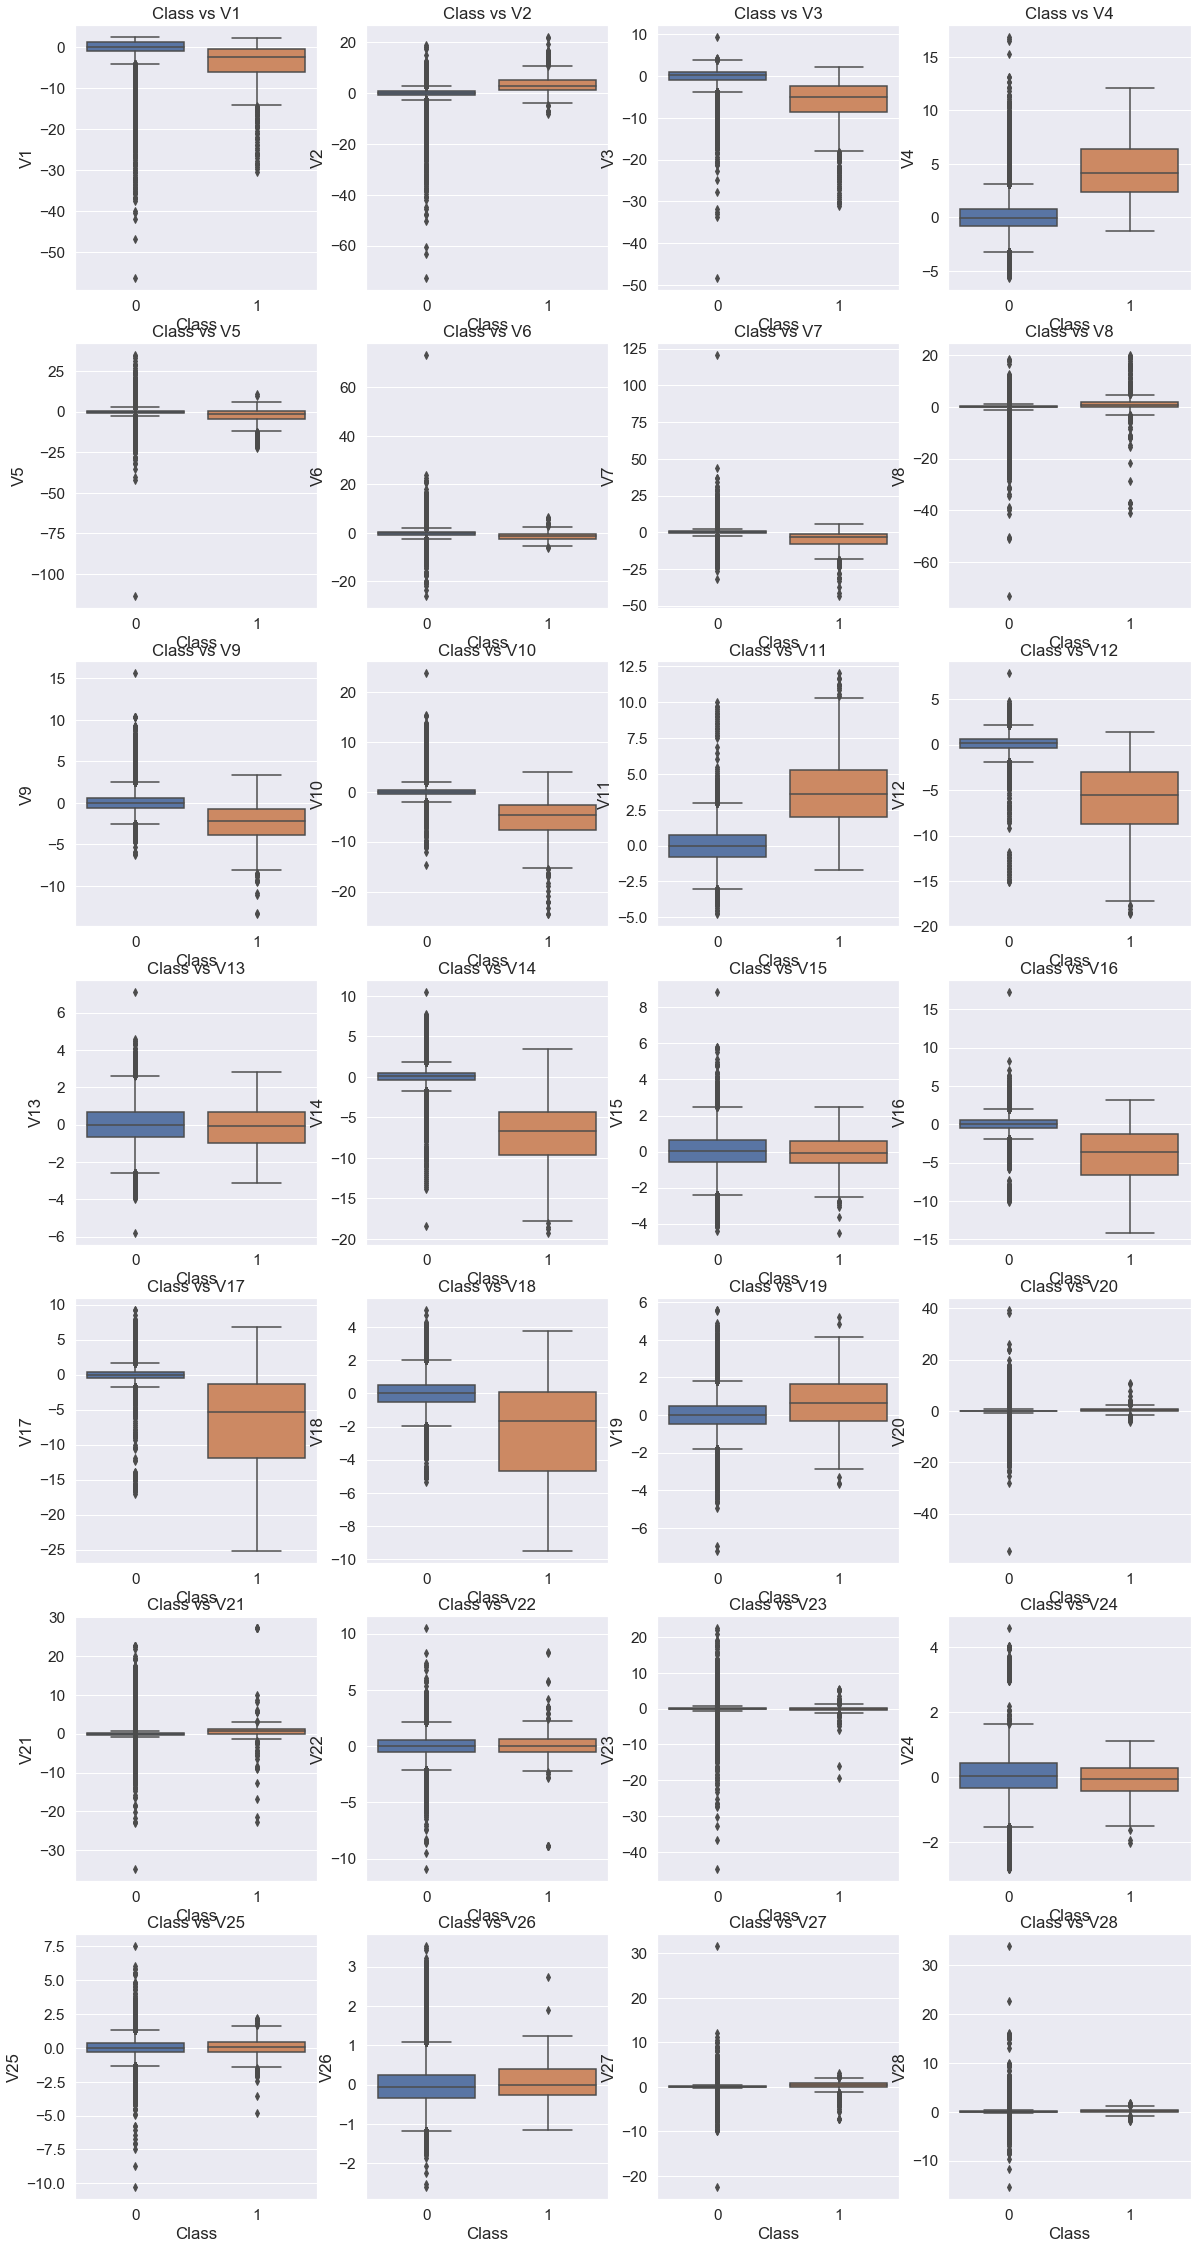

In [46]:
plt.figure(figsize=(14, 8))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,40))

i_ax=0
for i in range(len(features[0:4])):
    sns.boxplot(x="Class", y=features[i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[i]))
    
i_ax=1
for i in range(len(features[4:8])):
    sns.boxplot(x="Class", y=features[4+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[4+i]))
    
i_ax=2
for i in range(len(features[8:12])):
    sns.boxplot(x="Class", y=features[8+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[8+i]))
    
i_ax=3
for i in range(len(features[12:16])):
    sns.boxplot(x="Class", y=features[12+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[12+i]))
    
i_ax=4
for i in range(len(features[16:20])):
    sns.boxplot(x="Class", y=features[16+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[16+i]))
    
i_ax=5
for i in range(len(features[20:24])):
    sns.boxplot(x="Class", y=features[20+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[20+i]))
    
i_ax=6
for i in range(len(features[24:28])):
    sns.boxplot(x="Class", y=features[24+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[24+i]))
    
i_ax=7
for i in range(len(features[28:32])):
    sns.boxplot(x="Class", y=features[28+i], data=ccc, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[28+i]))
    
plt.show()

## DATA MODELLING

### Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
model_data = ccc.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(ccc['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the Data - Features and Labels

In [16]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

### Treating Imbalanced Data using SMOTE (Synthetic Minority Optimization Technique)

In [17]:
#IMPORTING SMOTE FROM IMBLEARN
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state = 0, n_jobs = -1)
model_train_lr , model_test_lr = oversampler.fit_sample(model_train, model_test)

### Splitting the Data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

### LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [20]:
lr_predict = lr.predict(X_test)

#### Prediction Scores

Accuracy: 94.4808%
Recall: 91.5108%
ROC AUC: 94.4901%


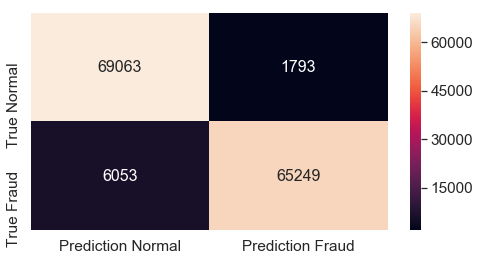

In [21]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

### Sampling Imbalanced Data using SMOTETomek

In [22]:
from imblearn.combine import SMOTETomek
sampler = SMOTETomek(random_state = 0, n_jobs = -1)
model_train_rf , model_test_rf = sampler.fit_sample(model_train, model_test)

### Shuffle Splitting the Data into Train and Test

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [24]:
for train_index, test_index in sss.split(model_train_rf, model_test_rf):
    X_train, X_test = model_train_rf[train_index], model_train_rf[test_index]
    Y_train, Y_test = model_test_rf[train_index], model_test_rf[test_index]

### SUPERVISED MODEL- RANDOM FOREST CLASSIFIER

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [26]:
rf_predict = rf.predict(X_test)

### Prediction Scores

Accuracy: 99.9859%
Recall: 100.0000%
ROC AUC: 99.9859%


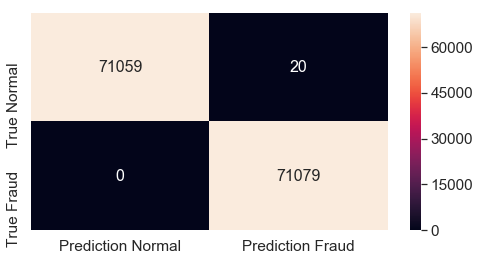

In [27]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

### Sampling Imbalanced Data using TomekLinks

In [28]:
from imblearn.under_sampling import TomekLinks

undersampler = TomekLinks( n_jobs = -1)

model_train_km , model_test_km = sampler.fit_sample(model_train, model_test)

### Optimal Clusters

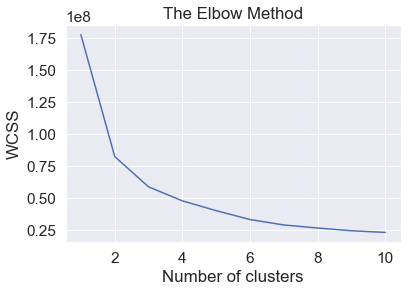

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans.fit(model_train_km)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### UNSUPERVISED CLUSTERING- K-MEANS CLUSTERING

In [30]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_train_km)

In [31]:
centers = kmeans.cluster_centers_

In [32]:
from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(model_train_km, centers, 'euclidean'))
distance['distance_mean'] = distance.apply(np.mean, axis=1)
distance.head()

,0,1,distance_mean
0,5.665211,38.961669,22.313440
1,4.792793,38.872886,21.832840
2,7.494235,39.347341,23.420788
3,6.191604,39.159712,22.675658
4,5.545008,38.900611,22.222809


In [33]:
out_per = np.percentile(distance['distance_mean'], 95)

In [34]:
model_predict_km = np.where(distance['distance_mean'] >= out_per, 1, 0)

### Prediction Scores

Accuracy: 54.3821%
Recall: 9.3822%
ROC AUC: 54.3821%


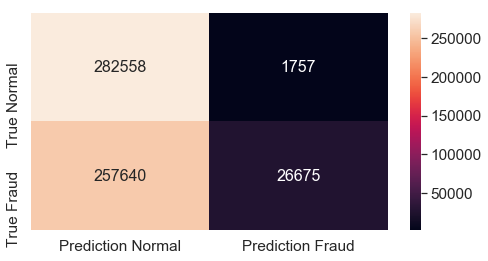

In [35]:
km_accuracy = accuracy_score(model_test_km, model_predict_km)
km_recall = recall_score(model_test_km, model_predict_km)
km_cm = confusion_matrix(model_test_km, model_predict_km)
km_auc = roc_auc_score(model_test_km, model_predict_km)

print("Accuracy: {:.4%}".format(km_accuracy))
print("Recall: {:.4%}".format(km_recall))
print("ROC AUC: {:.4%}".format(km_auc))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [36]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'K-Means': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'K-Means': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'K-Means': km_auc
}

Text(0.5, 0, 'Accuracy Score')

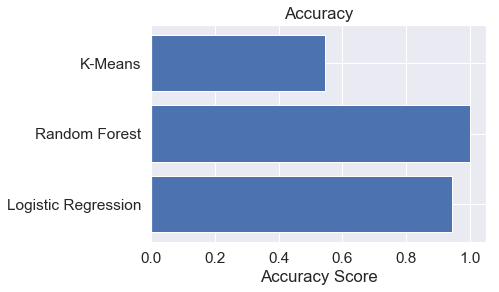

In [37]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

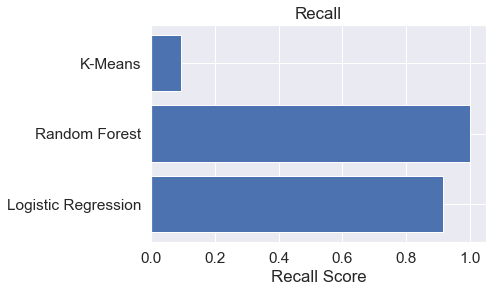

In [38]:
pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

Text(0.5, 0, 'AUC Score')

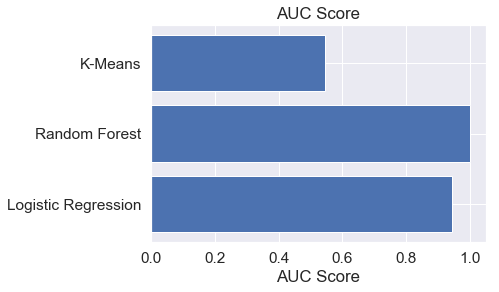

In [39]:
pyplot.title('AUC Score')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score')

## CONCLUSION

1. Random Forest Classifier has highest accuracy followed by Logistic Regression and K-means Clustering.
2. Supervised Learning method is performing better than that of Un-Supervised Learning Method.
3. Random Forest Classifier has higher AUC score Logistic Regresssion and K-means.
4. Random Forest Classifier has higher Recall score than Logistic Regresssion and K-means.



----------------------------------------THE END-----------------------------------------